In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from google.colab import files
upload = files.upload()

Saving STEM Students.xlsx to STEM Students.xlsx


In [3]:
df = pd.read_excel("STEM Students.xlsx")
df

,Timestamp,name,gender,age,major,level,the reason of attending lectures,attendance,attention scale,Do you take notes during the lectures,...,Do you study alone or in groups,studing hours on weekends,studing hours on weekdays,studing hours per day on the week leading up to an exams,CGPA,satisfaction,projects engagement outside of coursework,internships,satisfaction of the internship experience,What’s your university
0,2024-03-07 23:12:43.494,NaN,Male,19,CS,Sophomore,Attendance,I attend most of them,3,Yes,...,Alone,7,0,12.0,3.92,Yes,Yes,Yes,Positive,NaN
1,2024-03-07 23:30:27.481,NaN,Male,19,CS,Sophomore,Attendance,I attend most of them,3,No,...,Both,5,0,5.0,1.99,No,Yes,Yes,Neutral,NaN
2,2024-03-07 23:31:19.018,NaN,Male,19,CS,Sophomore,Both,I attend most of them,3,No,...,Alone,1,1,4.0,2.00,No,No,No,NaN,NaN
3,2024-03-07 23:31:40.637,NaN,Male,20,CS,Sophomore,Effectiveness,I don't skip lectures,4,No,...,Both,5,4,2.0,2.58,Yes,No,No,NaN,NaN
4,2024-03-07 23:33:32.904,NaN,Female,18,CS,Sophomore,Attendance,I attend most of them,3,No,...,Both,10,3,12.0,3.27,No,No,Yes,Neutral,NaN
5,2024-03-07 23:33:50.562,NaN,Female,19,CS,Sophomore,Attendance,I attend most of them,2,No,...,Alone,3,2,6.0,2.35,No,No,Yes,Neutral,NaN
6,2024-03-07 23:34:28.992,NaN,Male,19,CS,Sophomore,Attendance,I don't attend much,3,Yes,...,Alone,6,6,7.0,2.70,No,Yes,No,NaN,NaN
7,2024-03-07 23:37:01.124,NaN,Male,20,CS,Sophomore,Attendance,I attend most of them,3,No,...,Both,6,2,5.0,2.50,No,No,No,NaN,NaN
8,2024-03-07 23:40:04.821,NaN,Male,19,CS,Sophomore,Attendance,I don't attend much,2,No,...,Both,4,4,6.0,2.50,No,No,No,NaN,NaN
9,2024-03-07 23:41:00.457,NaN,Male,19,Engineering,Sophomore,Effectiveness,I don't skip lectures,3,No,...,Both,3,2,4.0,3.85,No,Yes,Yes,Positive,NaN


In [4]:
df.columns

Index(['Timestamp', 'name', 'gender', 'age', 'major', 'level',
       'the reason of attending lectures', 'attendance', 'attention scale',
       'Do you take notes during the lectures', 'study  material ',
       'Do you study alone or in groups', 'studing hours on weekends',
       'studing hours on weekdays',
       'studing hours per day on the week leading up to an exams', 'CGPA',
       'satisfaction', 'projects engagement outside of coursework',
       'internships ', 'satisfaction of the internship experience',
       'What’s your university '],
      dtype='object')

Quantitative data:

1. studing hours
2. CGPA

Categorical:
(that can be converted into ordinal)

1. motive (0/0.5/1)
2. attendance (1-4)
3. attention (1-5)
4. notes (0/1)
5. internships and projects (0/1)

In [75]:
pd.crosstab(df['gender'],'count')

col_0,count
gender,
Female,6
Male,22


In [5]:
df = df.drop(columns=['Timestamp', 'name','What’s your university ','age'])

In [8]:
pd.crosstab(df['attendance'],'count')

col_0,count
attendance,
I attend most of them,17
I don't attend much,4
I don't skip lectures,6
I rarely attend lectures,1


In [9]:
df.loc[df['attendance'] == "I don't skip lectures", 'attendance'] = '4'
df.loc[df['attendance'] == 'I attend most of them', 'attendance'] = '3'
df.loc[df['attendance'] == "I don't attend much", 'attendance'] = '2'
df.loc[df['attendance'] == 'I rarely attend lectures', 'attendance'] = '1'

In [10]:
pd.crosstab(df['attendance'],'count')

col_0,count
attendance,
1,1
2,4
3,17
4,6


In [11]:
df['CGPA'] = df['CGPA'].astype(float)
df['studing hours on weekdays'] = df['studing hours on weekdays'].astype(float)
df['studing hours on weekends'] = df['studing hours on weekends'].astype(float)
df['studing hours per day on the week leading up to an exams'] = df['studing hours per day on the week leading up to an exams'].astype(float)

df['attendance'] = df['attendance'].astype(float)
df['attention scale'] = df['attention scale'].astype(float)


In [12]:
gpa = df.groupby('gender')['CGPA'].apply(list).to_dict()
hours_weekday = df.groupby('gender')['studing hours on weekdays'].apply(list).to_dict()
hours_weekend = df.groupby('gender')['studing hours on weekends'].apply(list).to_dict()
hours_week = df.groupby('gender')['studing hours per day on the week leading up to an exams'].apply(list).to_dict()

In [60]:
males_gpa = gpa.get('Male', [])
females_gpa = gpa.get('Female', [])

males_hours_weekday = hours_weekday.get('Male', [])
females_hours_weekday = hours_weekday.get('Female', [])

males_hours_weekend = hours_weekend.get('Male', [])
females_hours_weekend = hours_weekend.get('Female', [])

males_hours_week = hours_week.get('Male', [])
females_hours_week = hours_week.get('Female', [])

In [14]:
motive = df.groupby('gender')['the reason of attending lectures'].apply(list).to_dict()
attendance = df.groupby('gender')['attendance'].apply(list).to_dict()
attention = df.groupby('gender')['attention scale'].apply(list).to_dict()
notes = df.groupby('gender')['Do you take notes during the lectures'].apply(list).to_dict()
#projects = df.groupby('gender')['Do you take notes during the lectures'].apply(list).to_dict()
#internships = df.groupby('gender')['Do you take notes during the lectures'].apply(list).to_dict()

In [19]:
males_motive = motive.get('Male', [])
females_motive = motive.get('Female', [])

males_attendance = attendance.get('Male', [])
females_attendance = attendance.get('Female', [])

males_attention = attention.get('Male', [])
females_attention = attention.get('Female', [])

males_notes= notes.get('Male', [])
females_notes = notes.get('Female', [])



# New Section

In [17]:
from collections import Counter

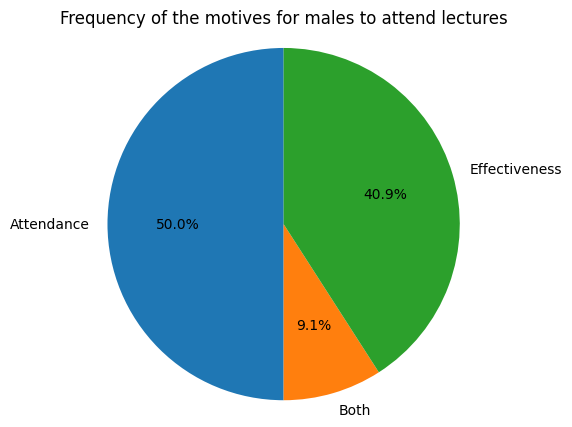

In [27]:
counter_males_motive = Counter(males_motive)
plt.figure(figsize=(5, 5))
plt.pie(counter_males_motive.values(), labels=counter_males_motive.keys(), autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('Frequency of the motives for males to attend lectures')
plt.show()

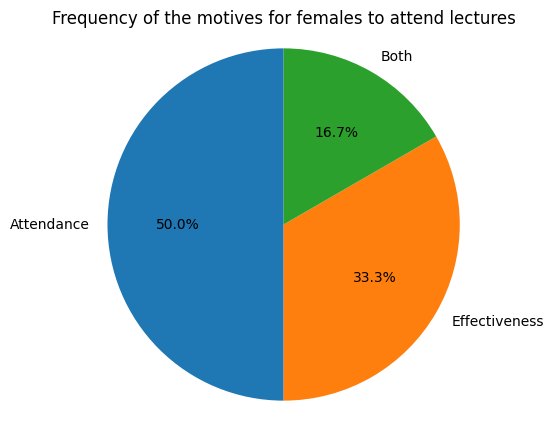

In [28]:
counter_females_motive = Counter(females_motive)
plt.figure(figsize=(5, 5))
plt.pie(counter_females_motive.values(), labels=counter_females_motive.keys(), autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('Frequency of the motives for females to attend lectures')
plt.show()

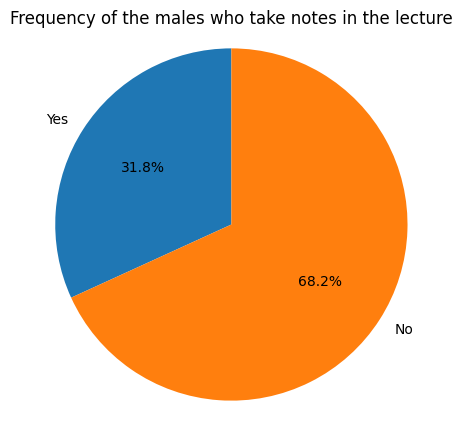

In [26]:
counter_males_notes = Counter(males_notes)
plt.figure(figsize=(5, 5))
plt.pie(counter_males_notes.values(), labels=counter_males_notes.keys(), autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('Frequency of the males who take notes in the lecture')
plt.show()

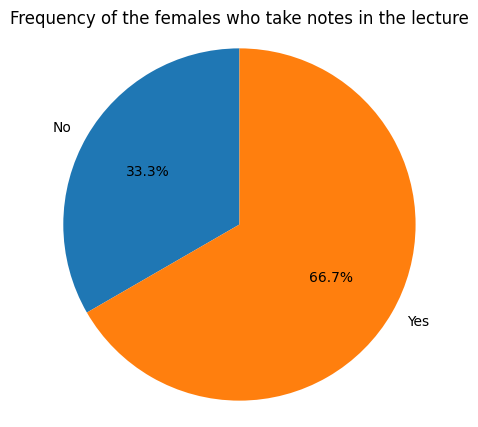

In [30]:
counter_females_notes = Counter(females_notes)
plt.figure(figsize=(5, 5))
plt.pie(counter_females_notes.values(), labels=counter_females_notes.keys(), autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('Frequency of the females who take notes in the lecture')
plt.show()

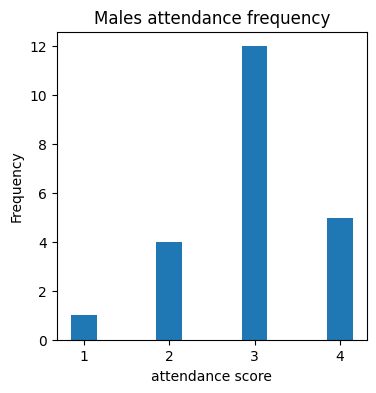

In [76]:
counter_males_attendance = Counter(males_attendance)

plt.figure(figsize=(4, 4))
plt.bar(counter_males_attendance.keys(), counter_males_attendance.values(),width=0.3)
plt.xlabel('attendance score')
plt.ylabel('Frequency')
plt.title('Males attendance frequency')
plt.show()

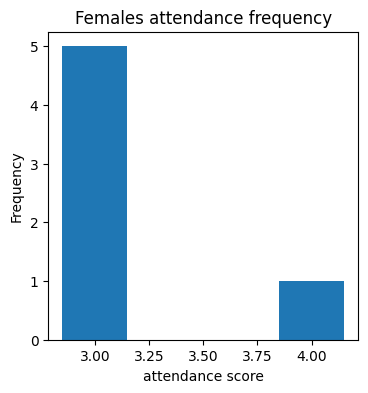

In [77]:
counter_females_attendance = Counter(females_attendance)

plt.figure(figsize=(4, 4))
plt.bar(counter_females_attendance.keys(), counter_females_attendance.values(),width=0.3)
plt.xlabel('attendance score')
plt.ylabel('Frequency')
plt.title('Females attendance frequency')
plt.show()

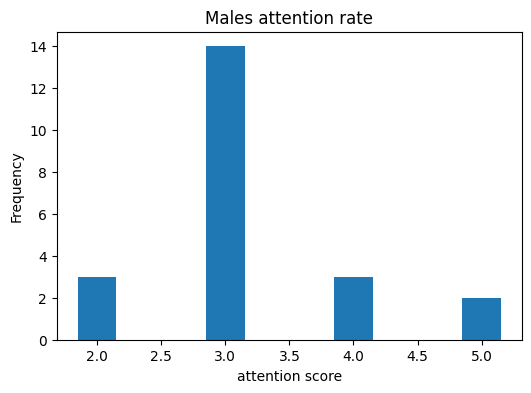

In [56]:
counter_males_attention = Counter(males_attention)

plt.figure(figsize=(6, 4))
plt.bar(counter_males_attention.keys(), counter_males_attention.values(),width=0.3)
plt.xlabel('attention score')
plt.ylabel('Frequency')
plt.title('Males attention rate')
plt.show()

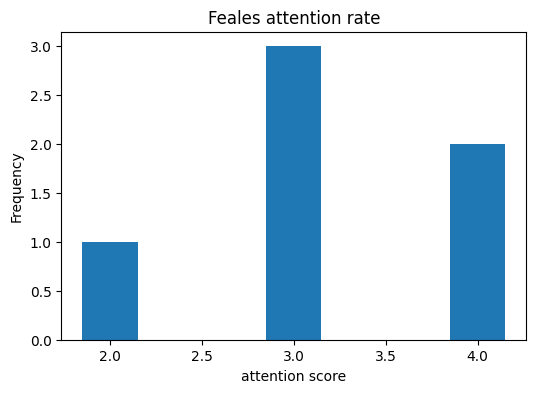

In [57]:
counter_females_attention = Counter(females_attention)

plt.figure(figsize=(6, 4))
plt.bar(counter_females_attention.keys(), counter_females_attention.values(),width=0.3)
plt.xlabel('attention score')
plt.ylabel('Frequency')
plt.title('Females attention rate')
plt.show()

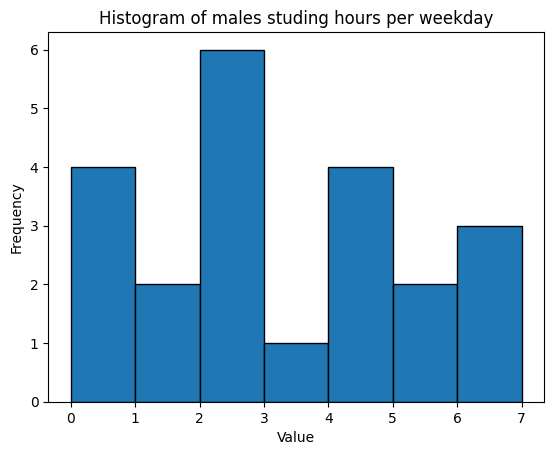

In [49]:
plt.hist(males_hours_weekday, bins=7, edgecolor='black')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of males studing hours per weekday')
plt.show()

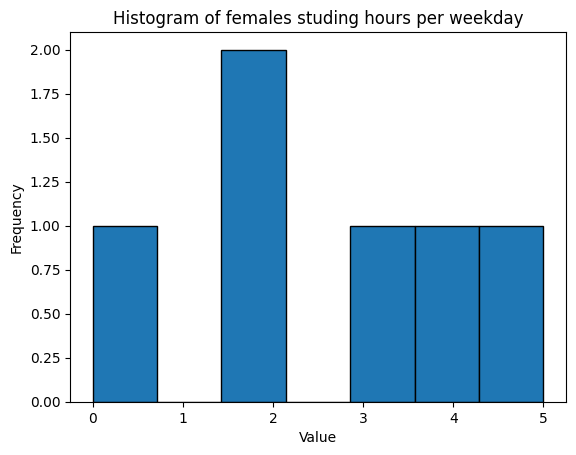

In [50]:
plt.hist(females_hours_weekday, bins=7, edgecolor='black')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of females studing hours per weekday')
plt.show()

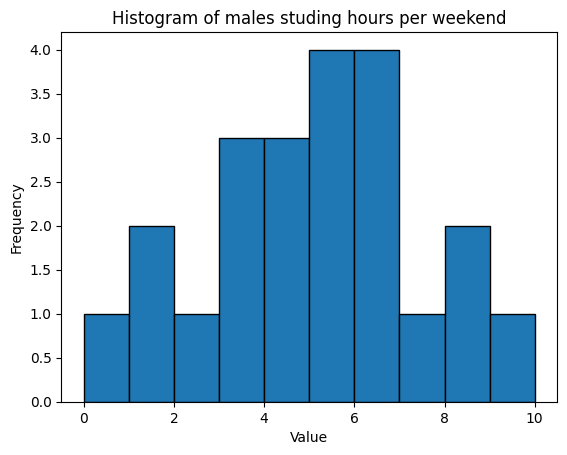

In [58]:
plt.hist(males_hours_weekend, bins=10, edgecolor='black')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of males studing hours per weekend')
plt.show()

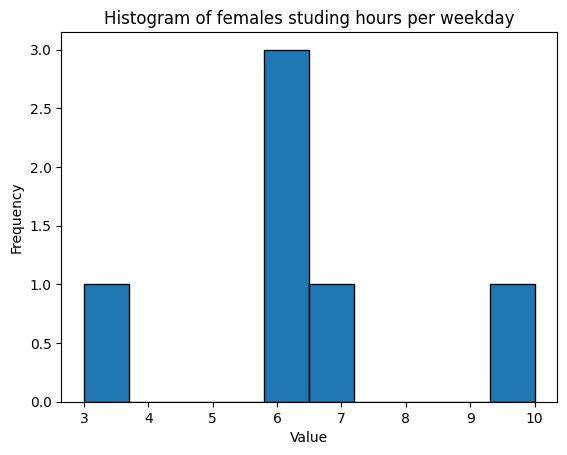

In [53]:
plt.hist(females_hours_weekend, bins=10, edgecolor='black')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of females studing hours per weekday')
plt.show()

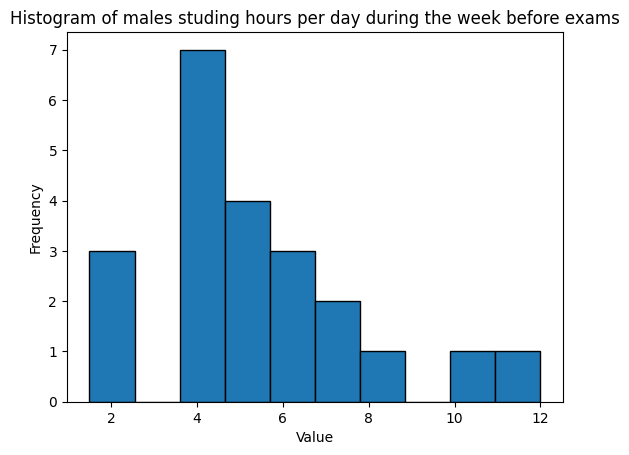

In [61]:
plt.hist(males_hours_week, bins=10, edgecolor='black')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of males studing hours per day during the week before exams')
plt.show()

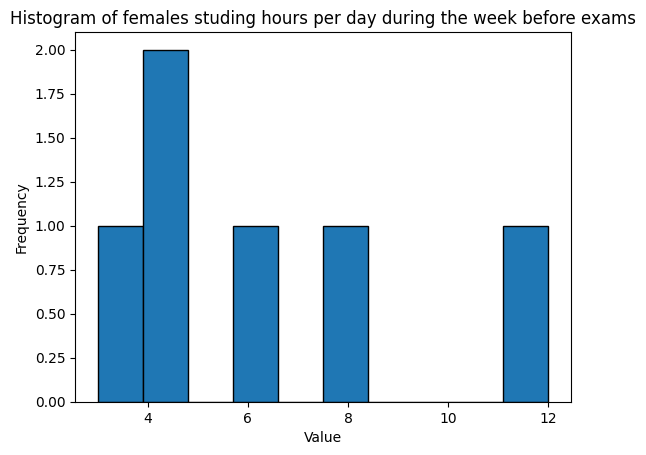

In [62]:
plt.hist(females_hours_week, bins=10, edgecolor='black')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of females studing hours per day during the week before exams')
plt.show()

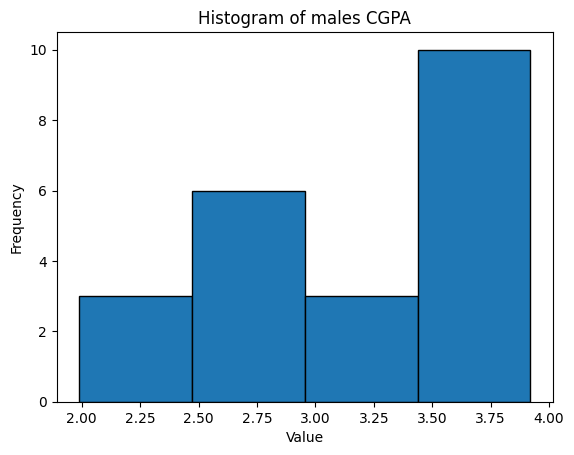

In [67]:
plt.hist(males_gpa, bins=4, edgecolor='black')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of males CGPA')
plt.show()

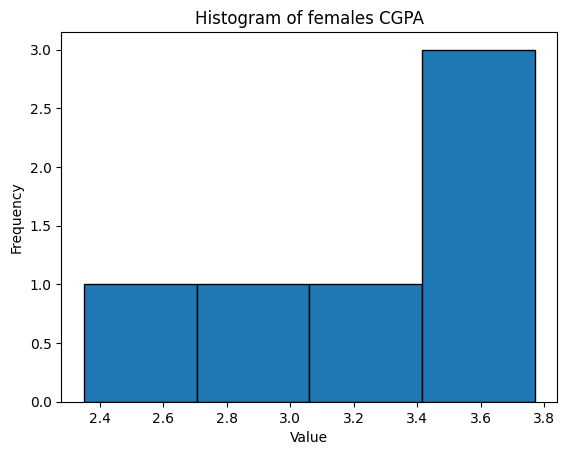

In [78]:
plt.hist(females_gpa, bins=4, edgecolor='black')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of females CGPA')
plt.show()

In [73]:
from scipy import stats

In [74]:
print("Males' CGPA Mean:", np.mean(males_gpa),'\t',"Males' CGPA Mean:", np.mean(females_gpa))
print("Males' CGPA Mode:", stats.mode(males_gpa),'\t',"Males' CGPA Mode:", stats.mode(females_gpa))
print("Males' CGPA Median:", np.median(males_gpa),'\t',"Males' CGPA Median:", np.median(females_gpa))

Males' CGPA Mean: 3.145454545454545 	 Males' CGPA Mean: 3.2616666666666667
Males' CGPA Mode: ModeResult(mode=3.91, count=3) 	 Males' CGPA Mode: ModeResult(mode=2.35, count=1)
Males' CGPA Median: 3.15 	 Males' CGPA Median: 3.475


In [79]:
print("Males", np.mean(males_hours_weekday),'\t',"Females", np.mean(females_hours_weekday))
print("Males", np.mean(males_hours_weekend),'\t',"Females", np.mean(females_hours_weekend))
print("Males", np.mean(males_hours_week),'\t',"Females", np.mean(females_hours_week))


Males 2.8181818181818183 	 Females 2.6666666666666665
Males 4.636363636363637 	 Females 6.333333333333333
Males 5.25 	 Females 6.166666666666667
